In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Data load
df = pd.read_csv(r"D:\prepare\student_performance_data.csv")

In [3]:
# Basic checks
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             1000 non-null   int64  
 1   study_hours            1000 non-null   float64
 2   attendance_percentage  1000 non-null   int64  
 3   previous_gpa           1000 non-null   float64
 4   extracurricular_hours  1000 non-null   int64  
 5   family_support         1000 non-null   object 
 6   internet_access        1000 non-null   object 
 7   final_result           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


student_id               0
study_hours              0
attendance_percentage    0
previous_gpa             0
extracurricular_hours    0
family_support           0
internet_access          0
final_result             0
dtype: int64

In [4]:
# Drop identifier
df.drop(columns=["student_id"], inplace=True)

In [5]:
# Binary categorical encoding
binary_cols = ["family_support", "internet_access"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [6]:
# Target encoding
le = LabelEncoder()
df["final_result"] = le.fit_transform(df["final_result"])

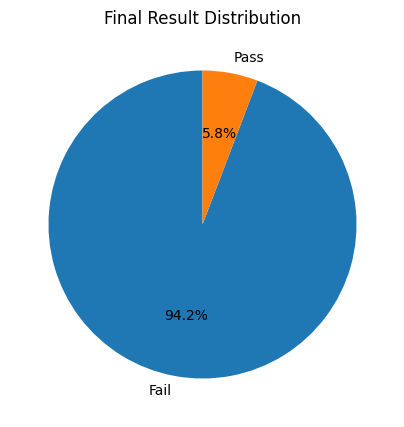

In [7]:
# Final result distribution
result_counts = df["final_result"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    result_counts,
    labels=["Fail", "Pass"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Final Result Distribution")
plt.show()

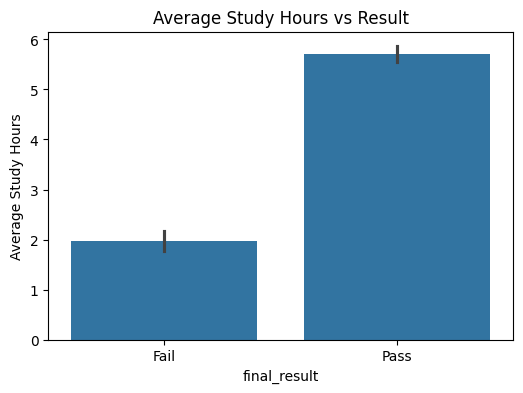

In [8]:
# Study hours vs result
plt.figure(figsize=(6,4))
sns.barplot(
    x="final_result",
    y="study_hours",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Fail", "Pass"])
plt.title("Average Study Hours vs Result")
plt.ylabel("Average Study Hours")
plt.show()

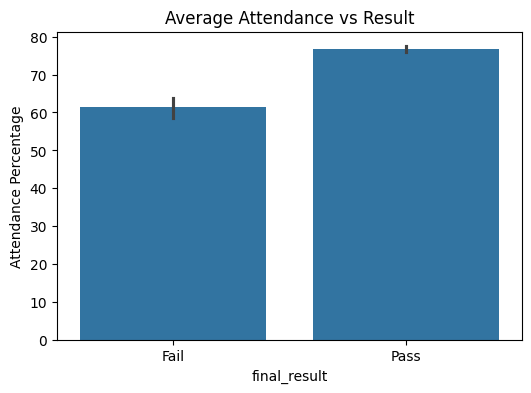

In [9]:
# Attendance vs result
plt.figure(figsize=(6,4))
sns.barplot(
    x="final_result",
    y="attendance_percentage",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Fail", "Pass"])
plt.title("Average Attendance vs Result")
plt.ylabel("Attendance Percentage")
plt.show()

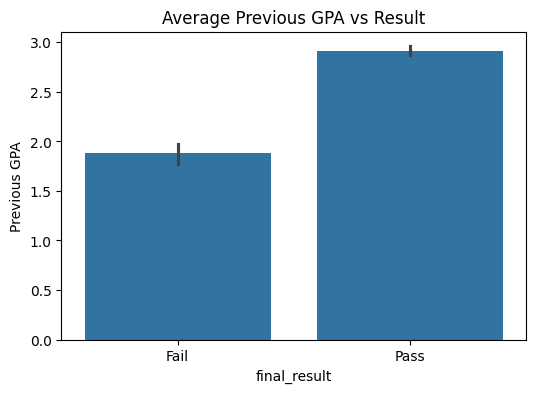

In [10]:
# Previous GPA vs result
plt.figure(figsize=(6,4))
sns.barplot(
    x="final_result",
    y="previous_gpa",
    data=df,
    estimator=np.mean
)
plt.xticks([0,1], ["Fail", "Pass"])
plt.title("Average Previous GPA vs Result")
plt.ylabel("Previous GPA")
plt.show()

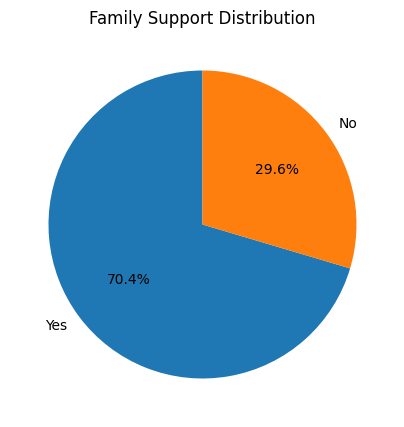

In [11]:
# Family support distribution
support_counts = df["family_support"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    support_counts,
    labels=["Yes", "No"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Family Support Distribution")
plt.show()

In [12]:
# Features and target
X = df.drop(columns=["final_result"])
y = df["final_result"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [13]:
numeric_features = [
    "study_hours",
    "attendance_percentage",
    "previous_gpa",
    "extracurricular_hours"
]

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.94


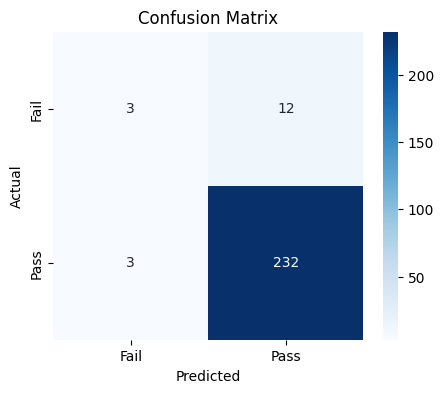

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fail", "Pass"],
    yticklabels=["Fail", "Pass"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Fail", "Pass"]
))

              precision    recall  f1-score   support

        Fail       0.50      0.20      0.29        15
        Pass       0.95      0.99      0.97       235

    accuracy                           0.94       250
   macro avg       0.73      0.59      0.63       250
weighted avg       0.92      0.94      0.93       250



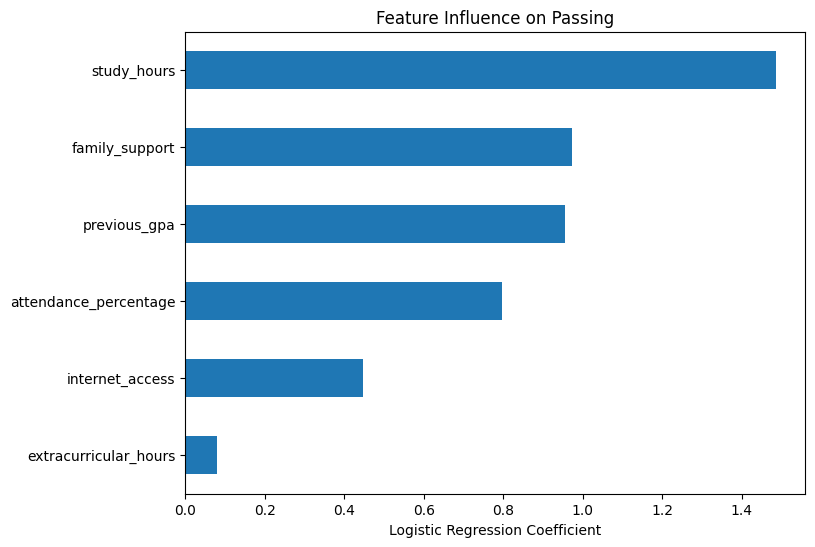

In [18]:
coefficients = pd.Series(
    model.coef_[0],
    index=X_train.columns
).sort_values()

coefficients.plot(kind="barh", figsize=(8,6))
plt.title("Feature Influence on Passing")
plt.xlabel("Logistic Regression Coefficient")
plt.show()